# Schizophrenia

---

## Modules and Setup

In [65]:
import sys
import os as os
import numpy as np
import pandas.api.types as ptypes
import scipy.stats as stats
import pandas as pd
from scipy.stats import norm, boxcox
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from IPython.display import Markdown, display
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ucimlrepo import fetch_ucirepo 



In [66]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [67]:
previous_dir = None # Failsafe if directory does not start in notebook directory 
while not os.path.exists('README.md'):
    current_dir = os.getcwd()

    if current_dir == previous_dir:
        print('Warning: Project root not found. Project currently at', current_dir)
        break

    previous_dir = current_dir
    os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [68]:
src_path = os.path.abspath(os.path.join(os.getcwd(), "src"))

if src_path not in sys.path:
    sys.path.append(src_path)

In [69]:
import MLHelperFunctions as MLH 

---

# 1. Project Overview

---

# 2. Objectives

---

# 3. Dataset

## 3.1. Dataset Features



| Feature Name              | Type        | Description                                      | Values (if categorical)                                         |
|---------------------------|------------|--------------------------------------------------|-----------------------------------------------------------------|
| Patient_ID               | Numerical  | Unique identifier assigned to each patient      | Unique ID                                                      |
| Age                      | Numerical  | Patient's age                                   | 18-80                                                          |
| Gender                   | Categorical| Gender of the patient                           | 0: Female, 1: Male                                             |
| Education_Level          | Categorical| Highest level of education completed           | 1: Primary, 2: Middle, 3: High School, 4: University, 5: Postgraduate |
| Marital_Status          | Categorical| Marital status of the patient                  | 0: Single, 1: Married, 2: Divorced, 3: Widowed                 |
| Occupation              | Categorical| Employment status of the patient               | 0: Unemployed, 1: Employed, 2: Retired, 3: Student             |
| Income_Level            | Categorical| Income level category                          | 0: Low, 1: Medium, 2: High                                     |
| Living_Area             | Categorical| Living area classification                     | 0: Rural, 1: Urban                                            |
| Diagnosis               | Categorical| Schizophrenia diagnosis status                 | 0: Not schizophrenic, 1: Schizophrenic                         |
| Disease_Duration        | Numerical  | Duration of illness (years)                    | 1-40                                                           |
| Hospitalizations        | Numerical  | Number of hospital admissions                  | 0-10                                                           |
| Family_History         | Categorical| Family history of schizophrenia                | 0: No, 1: Yes                                                 |
| Substance_Use          | Categorical| Substance use history (tobacco, alcohol, drugs)| 0: No, 1: Yes                                                 |
| Suicide_Attempt        | Categorical| History of suicide attempts                    | 0: No, 1: Yes                                                 |
| Positive_Symptom_Score | Numerical  | Positive symptom severity                      | 0-100                                                          |
| Negative_Symptom_Score | Numerical  | Negative symptom severity                      | 0-100                                                          |
| GAF_Score              | Numerical  | Global assessment of functioning               | 0-100                                                          |
| Social_Support         | Categorical| Level of social support                        | 0: Low, 1: Medium, 2: High                                     |
| Stress_Factors         | Categorical| Level of stress factors                        | 0: Low, 1: Medium, 2: High                                     |
| Medication_Adherence   | Categorical| Adherence to medication regimen                | 0: Poor, 1: Moderate, 2: Good                                  |


---

# 4. Workflow

## 4.1. Loading and Tidying the Data

Loading in the data:

In [70]:
raw_data_file = os.path.abspath(os.path.join(os.getcwd(), 'data', 'raw', 'schizophrenia_dataset.csv')) 
if os.path.exists(raw_data_file): 
    df = pd.read_csv(raw_data_file)
else:
    print('Data file is missing:', raw_data_file) # Debugging for missing file

In [71]:
df.head()

,Patient_ID,Age,Gender,Education_Level,Maritial_Status,Occupation,Income_Level,Living_Area,Diagnosis,Disease_Duration,Hospitalizations,Family_History,Substance_use,Suicide_Attempt,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_factors,Medication_Adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [72]:
df.tail()

,Patient_ID,Age,Gender,Education_Level,Maritial_Status,Occupation,Income_Level,Living_Area,Diagnosis,Disease_Duration,Hospitalizations,Family_History,Substance_use,Suicide_Attempt,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_factors,Medication_Adherence
9995,9996,72,0,2,3,3,0,1,1,18,1,1,0,1,84,74,54,1,1,1
9996,9997,27,0,3,3,3,0,0,1,6,6,0,0,0,99,50,53,2,2,0
9997,9998,31,1,3,2,0,0,0,1,29,9,1,1,0,65,65,60,1,1,1
9998,9999,56,1,4,1,1,2,1,0,0,0,0,0,0,38,10,74,0,1,2
9999,10000,53,0,1,3,1,0,1,0,0,0,0,0,0,24,21,87,1,2,0


Check for missing variables:

In [73]:
df.isna().sum(axis = 0)

Patient_ID                0
Age                       0
Gender                    0
Education_Level           0
Maritial_Status           0
Occupation                0
Income_Level              0
Living_Area               0
Diagnosis                 0
Disease_Duration          0
Hospitalizations          0
Family_History            0
Substance_use             0
Suicide_Attempt           0
Positive_Symptom_Score    0
Negative_Symptom_Score    0
GAF_Score                 0
Social_Support            0
Stress_factors            0
Medication_Adherence      0
dtype: int64

Overview of Dtypes and columns in the dataframe:

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Patient_ID              10000 non-null  int64
 1   Age                     10000 non-null  int64
 2   Gender                  10000 non-null  int64
 3   Education_Level         10000 non-null  int64
 4   Maritial_Status         10000 non-null  int64
 5   Occupation              10000 non-null  int64
 6   Income_Level            10000 non-null  int64
 7   Living_Area             10000 non-null  int64
 8   Diagnosis               10000 non-null  int64
 9   Disease_Duration        10000 non-null  int64
 10  Hospitalizations        10000 non-null  int64
 11  Family_History          10000 non-null  int64
 12  Substance_use           10000 non-null  int64
 13  Suicide_Attempt         10000 non-null  int64
 14  Positive_Symptom_Score  10000 non-null  int64
 15  Negative_Symptom_Sco

All of the variables are encoded numerically

Check to see if patient ID's equal the number of rows:

In [75]:
df['Patient_ID'].max() == df.shape[0]

np.True_

### 4.1.1 Decoding the Categorical Variables

Creating a dictionary relating numerical values to the categorical values according to the data dictionary to help with EDA:

In [76]:
col_dict = {'Gender': {0: 'Female', 1: 'Male'},
            'Education_Level': {1: 'Primary', 2: 'Middle School', 3: 'High School', 4: 'University', 5: 'Postgraduate'},
            'Maritial_Status': {0: 'Single', 1: 'Married', 2: 'Divorced', 3: 'Widowed'},
            'Occupation': {0: 'Unemployed', 1: 'Employed', 2: 'Retired', 3: 'Student'},
            'Income_Level': {0: 'Low', 1: 'Medium', 2: 'High'},
            'Living_Area': {0: 'Rural', 1: 'Urban'},
            'Diagnosis': {0: 'Not Schizophrenic', 1: 'Schizophrenic'},
            'Family_History': {0: 'No', 1: 'Yes'},
            'Substance_use': {0: 'No', 1: 'Yes'},
            'Suicide_Attempt': {0: 'No', 1: 'Yes'},
            'Social_Support': {0: 'Low', 1: 'Medium', 2: 'High'},
            'Stress_factors': {0: 'Low', 1: 'Medium', 2: 'High'},
            'Medication_Adherence': {0: 'Poor', 1: 'Moderate', 2: 'Good'}}

Decoding the categorical variables:

In [77]:
df_decoded = df.copy()
df_decoded[list(col_dict.keys())] =  df[col_dict.keys()].apply(lambda col: col.map(col_dict[col.name]))

In [78]:
df_decoded

,Patient_ID,Age,Gender,Education_Level,Maritial_Status,Occupation,Income_Level,Living_Area,Diagnosis,Disease_Duration,Hospitalizations,Family_History,Substance_use,Suicide_Attempt,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_factors,Medication_Adherence
0,1,72,Male,University,Divorced,Unemployed,High,Urban,Not Schizophrenic,0,0,No,No,No,32,48,72,Low,High,Good
1,2,49,Male,Postgraduate,Divorced,Retired,Medium,Rural,Schizophrenic,35,1,Yes,Yes,Yes,51,63,40,High,High,Poor
2,3,53,Male,Postgraduate,Widowed,Retired,Medium,Rural,Schizophrenic,32,0,Yes,No,No,72,85,51,Low,Medium,Moderate
3,4,67,Male,High School,Divorced,Unemployed,High,Rural,Not Schizophrenic,0,0,No,Yes,No,10,21,74,Medium,Medium,Good
4,5,54,Female,Primary,Divorced,Unemployed,High,Urban,Not Schizophrenic,0,0,No,No,No,4,27,98,Low,Medium,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,72,Female,Middle School,Widowed,Student,Low,Urban,Schizophrenic,18,1,Yes,No,Yes,84,74,54,Medium,Medium,Moderate
9996,9997,27,Female,High School,Widowed,Student,Low,Rural,Schizophrenic,6,6,No,No,No,99,50,53,High,High,Poor
9997,9998,31,Male,High School,Divorced,Unemployed,Low,Rural,Schizophrenic,29,9,Yes,Yes,No,65,65,60,Medium,Medium,Moderate
9998,9999,56,Male,University,Married,Employed,High,Urban,Not Schizophrenic,0,0,No,No,No,38,10,74,Low,Medium,Good


Check for any miscodings:

In [79]:
df_decoded.isna().sum(axis = 0)

Patient_ID                0
Age                       0
Gender                    0
Education_Level           0
Maritial_Status           0
Occupation                0
Income_Level              0
Living_Area               0
Diagnosis                 0
Disease_Duration          0
Hospitalizations          0
Family_History            0
Substance_use             0
Suicide_Attempt           0
Positive_Symptom_Score    0
Negative_Symptom_Score    0
GAF_Score                 0
Social_Support            0
Stress_factors            0
Medication_Adherence      0
dtype: int64

In [80]:
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Patient_ID              10000 non-null  int64 
 1   Age                     10000 non-null  int64 
 2   Gender                  10000 non-null  object
 3   Education_Level         10000 non-null  object
 4   Maritial_Status         10000 non-null  object
 5   Occupation              10000 non-null  object
 6   Income_Level            10000 non-null  object
 7   Living_Area             10000 non-null  object
 8   Diagnosis               10000 non-null  object
 9   Disease_Duration        10000 non-null  int64 
 10  Hospitalizations        10000 non-null  int64 
 11  Family_History          10000 non-null  object
 12  Substance_use           10000 non-null  object
 13  Suicide_Attempt         10000 non-null  object
 14  Positive_Symptom_Score  10000 non-null  int64 
 15  Neg

## 4.2. Exploratory Data Analysis (EDA)

### 4.2.1. Overview of the Dataset

Summary of the numerical features of the data:

In [81]:
df_decoded.describe()

,Patient_ID,Age,Disease_Duration,Hospitalizations,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score
count,10000.000000000,10000.000000000,10000.000000000,10000.000000000,10000.000000000,10000.000000000,10000.000000000
mean,5000.500000000,48.867700000,5.859000000,1.440300000,39.019000000,39.461400000,67.031800000
std,2886.895679907,18.215053542,11.066813744,2.824151818,27.276961749,27.017499969,23.999833082
min,1.000000000,18.000000000,0.000000000,0.000000000,0.000000000,0.000000000,10.000000000
25%,2500.750000000,33.000000000,0.000000000,0.000000000,17.000000000,18.000000000,54.000000000
50%,5000.500000000,49.000000000,0.000000000,0.000000000,35.000000000,35.000000000,72.000000000
75%,7500.250000000,65.000000000,5.250000000,1.000000000,57.000000000,57.000000000,86.000000000
max,10000.000000000,80.000000000,40.000000000,10.000000000,100.000000000,100.000000000,100.000000000


All variables appear to be within expected ranges without any unusual outliers. The following is an overview of the categorical features:

In [82]:
df_decoded.describe(include = np.object_)

,Gender,Education_Level,Maritial_Status,Occupation,Income_Level,Living_Area,Diagnosis,Family_History,Substance_use,Suicide_Attempt,Social_Support,Stress_factors,Medication_Adherence
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,5,4,4,3,2,2,2,2,2,3,3,3
top,Male,Postgraduate,Widowed,Employed,Low,Rural,Not Schizophrenic,No,No,No,Medium,Low,Good
freq,5026,2143,2569,2566,3357,5006,7113,6804,7823,9116,3381,3345,4155


### 4.2.2. Target Variable Analysis

The target variables will be `Diagnosis` and `GAF-Score`. `Diagnosis` will be tested will all variables exluding the `Positive Symptom Score`, `Negative Symptom Score`, and `GAF Score` since these measurements are determined after diagnosis and would introduce data leakage into the models.

### 4.2.2.1 `Diagnosis`

In [83]:
diagnosis_counts = df_decoded['Diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

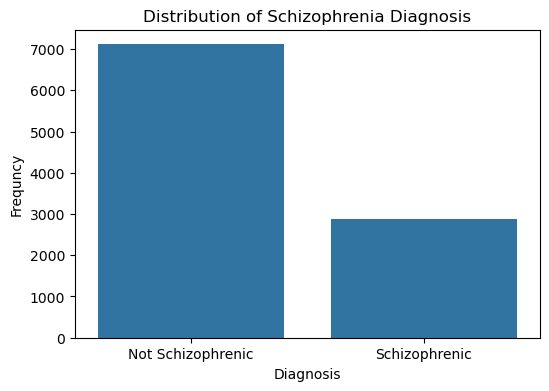

In [84]:
plt.figure(figsize=(6,4))
sns.barplot(data = diagnosis_counts, x = 'Diagnosis', y = 'Count')
plt.xlabel('Diagnosis')
plt.ylabel('Frequncy')
plt.title("Distribution of Schizophrenia Diagnosis")
plt.savefig(os.path.abspath(os.path.join(os.getcwd(), 'outputs/visuals/Distribution_SchizophreniaDaignosis')));
plt.show();

The dataset contains 7000 patients without schizophrenia and 3000 patients with schizophrenia

### 4.2.2.2 `GAF_score`

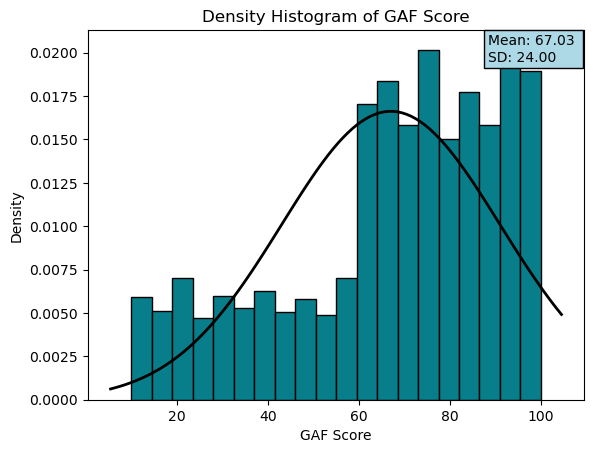

In [85]:
MLH.histo(X = df_decoded['GAF_Score'], xlabel = 'GAF Score', title = 'Density Histogram of GAF Score', filename = 'Distribution_GAF_Score')

The `GAF_Score` distribution appears right-skewed, meaning there are more high-functioning individuals than low-functioning ones. The average GAF Score is around 67, indicating moderate functional impairment. There is considerable spread, meaning some individuals score very low (severe impairment) while others score very high (good functioning). A BoxCox power transformation will be considered in the case any linear models are used.

In [86]:
boxcox(x = df_decoded['GAF_Score'])

(array([533.24580328, 210.94890858, 309.551536  , ..., 400.0126044 ,
        556.78335765, 718.57984717], shape=(10000,)),
 np.float64(1.5746372159538495))

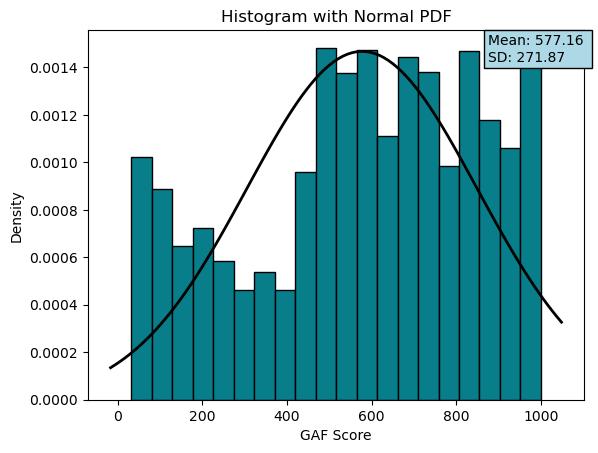

In [87]:
MLH.histo(X = np.pow(df_decoded['GAF_Score'], 1.5), xlabel = 'GAF Score', filename = 'Exp_Distribution_GAF_Score')

Compared to the original GAF Score histogram, the right skew has been reduced. The distribution is closer to normal, though still somewhat spread out.

### 4.2.3. Univariate Analysis

#### 4.2.3.1. Numerical Variables

##### 4.2.3.1.1. `Age`

`Age` is the age of the patient.

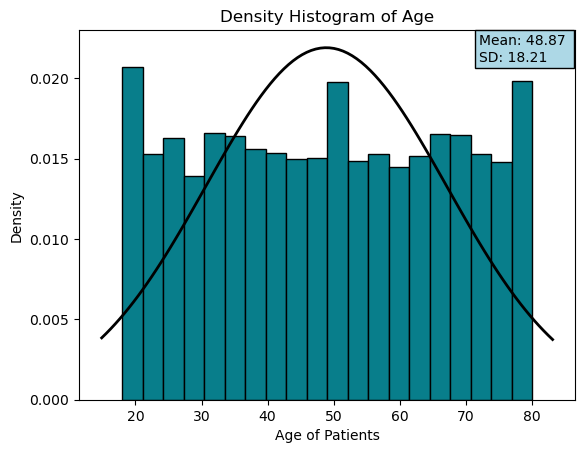

In [88]:
MLH.histo(X = df_decoded['Age'], xlabel = 'Age of Patients', title = 'Density Histogram of Age', filename = 'Distribution_Age')

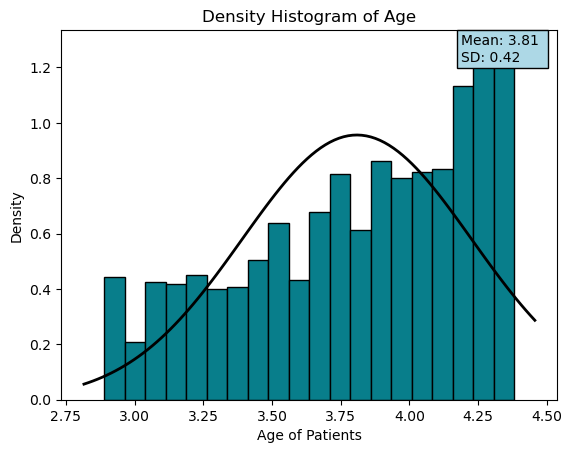

In [118]:
MLH.histo(X = np.log(df_decoded['Age']), xlabel = 'Age of Patients', title = 'Density Histogram of Age', filename = 'Distribution_Age_log')

The distribution appears fairly uniform, with no strong skewness.

##### 4.2.3.1.2. `Disease_Duration`

`Disease_Duration` represents the number of years a patient has had schizophrenia.

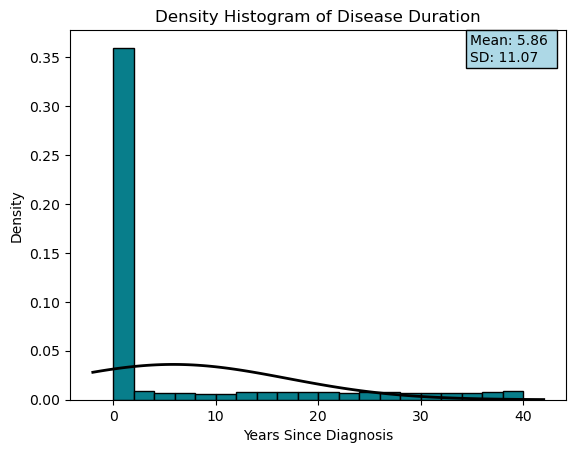

In [89]:
MLH.histo(X = df_decoded['Disease_Duration'], xlabel = 'Years Since Diagnosis', title = 'Density Histogram of Disease Duration', filename = 'Distribution_Disease_Duration')


`Disease_Duration` is highly skewed indicating most patients have been diagnosed very recently, with fewer having long-term diagnoses.

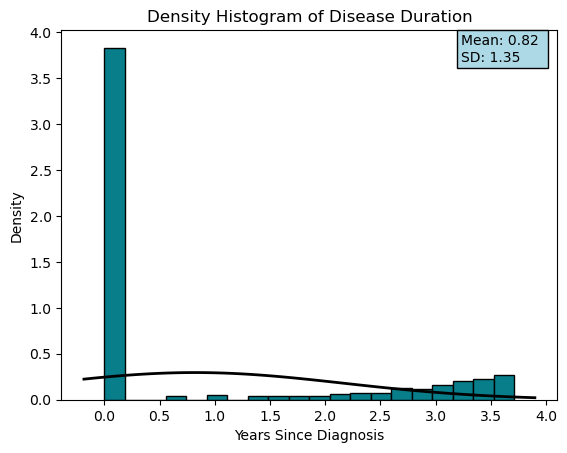

In [90]:
MLH.histo(X = np.log(df_decoded['Disease_Duration'] + 1), xlabel = 'Years Since Diagnosis', title = 'Density Histogram of Disease Duration', filename = 'Log_Distribution_Disease_Duration')

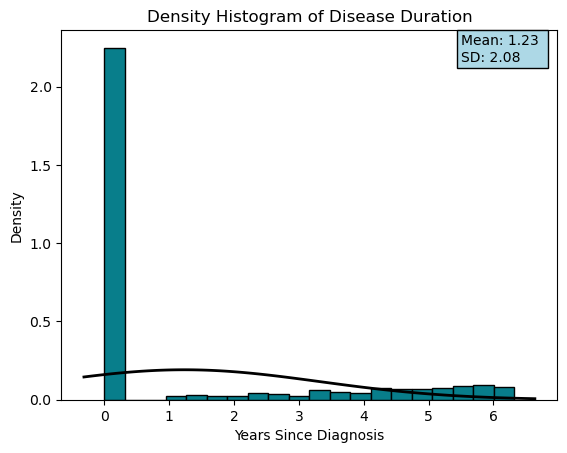

In [91]:
MLH.histo(X = np.sqrt(df_decoded['Disease_Duration']), xlabel = 'Years Since Diagnosis', title = 'Density Histogram of Disease Duration', filename = 'Sqrt_Distribution_Disease_Duration')

Niether transformation helped out the distribution of disease duration. Binning will be considered during feature transformation.

##### 4.2.3.1.3. `Hospitalizations`

`Hospitalizations` represents the number of times a patient has been hospitalized.

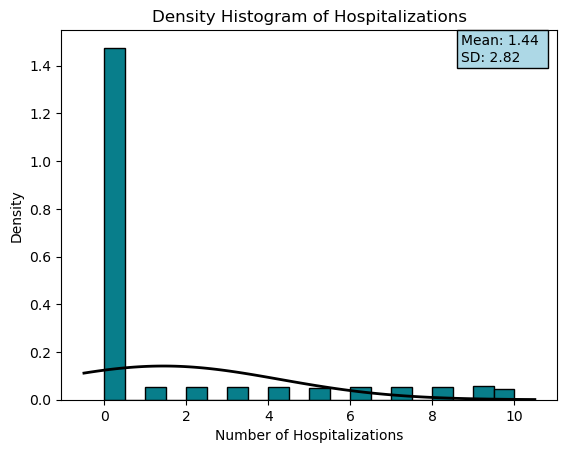

In [92]:
MLH.histo(X = df_decoded['Hospitalizations'], xlabel = 'Number of Hospitalizations', title = 'Density Histogram of Hospitalizations', filename = 'Distribution_Hospitalizations')


Most patients have 0 or very few hospitalizations, while some have much higher values. There is highly right-skew, Transformations will be considered.

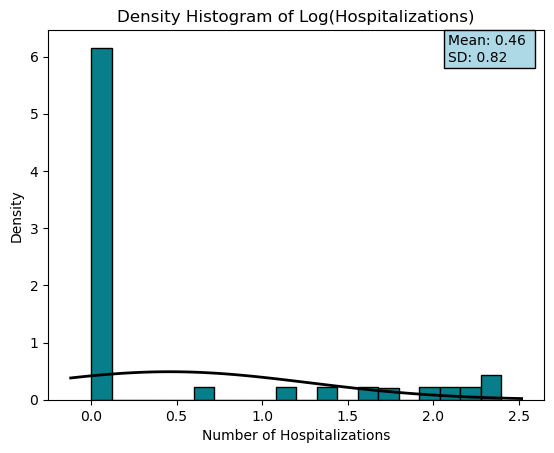

In [93]:
MLH.histo(X = np.log(df_decoded['Hospitalizations'] + 1), xlabel = 'Number of Hospitalizations', title = 'Density Histogram of Log(Hospitalizations)', filename = 'Log_Distribution_Hospitalizations')

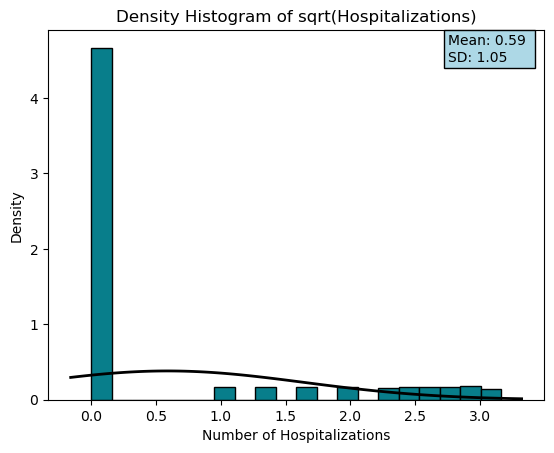

In [94]:
MLH.histo(X = np.sqrt(df_decoded['Hospitalizations']), xlabel = 'Number of Hospitalizations', title = 'Density Histogram of sqrt(Hospitalizations)', filename = 'Sqrt_Distribution_Hospitalizations')

Since the skew still remains after transformations, binning will considered during feature transformation.

##### 4.2.3.1.3. `Positive_Symptom_Score`

`Positive_Symptom_Score` represents the severity of positive symptoms in schizophrenia (e.g., hallucinations, delusions).

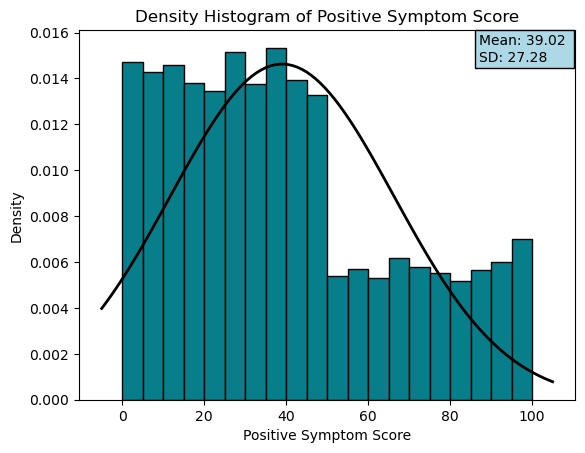

In [95]:
MLH.histo(X = df_decoded['Positive_Symptom_Score'], xlabel = 'Positive Symptom Score', title = 'Density Histogram of Positive Symptom Score', filename = 'Distribution_Positive_Symptom_Score')

`Positive_Symptom_Score` shows slight right skew indicating patiehts have lower to moderate symptom scores than severe scores.

##### 4.2.3.1.4. `Negative_Symptom_Score`

`Negative_Symptom_Score` represents the severity of negative symptoms in schizophrenia (e.g., social withdrawal, lack of motivation).

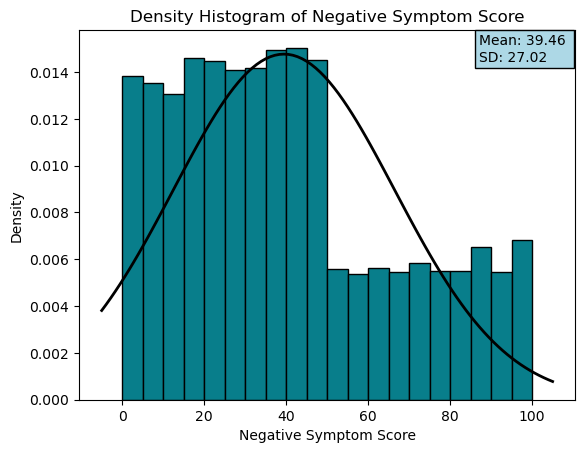

In [96]:
MLH.histo(X = df_decoded['Negative_Symptom_Score'], xlabel = 'Negative Symptom Score', title = 'Density Histogram of Negative Symptom Score', filename = 'Distribution_Negative_Symptom_Score')

`Negative_Symptom_Score` shows slight right skew indicating patiehts have lower to moderate symptom scores than severe scores.

#### 4.2.3.2. Categorical Variables

##### 4.2.3.2.1. `Gender`

`Gender` represents the gender of the patient.

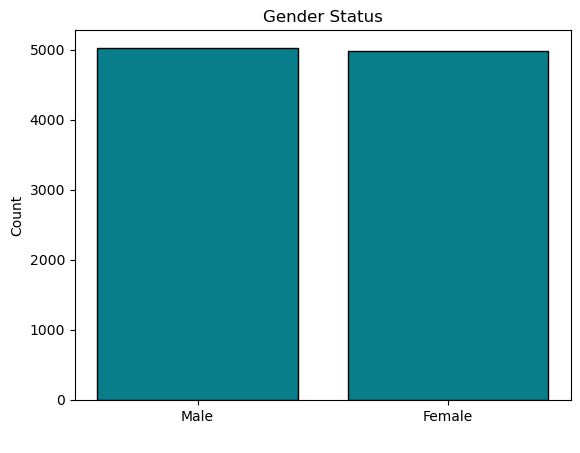

In [97]:
MLH.bar_graph(X = df_decoded['Gender'], title = 'Gender Status', xlabel = ' ', filename = 'Distribution_Gender.png')

There is an equal amount of males and females in the dataset.

##### 4.2.3.2.2. `Education_Level`

`Education_Level` represents the highest level of education completed by the patient.

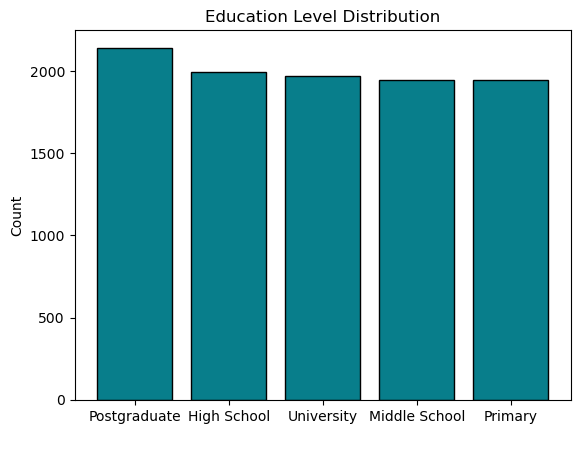

In [98]:
MLH.bar_graph(X = df_decoded['Education_Level'], title = 'Education Level Distribution', xlabel = ' ', filename = 'Distribution_Education_Level')

The distribution is fairly balanced across education levels. Postgraduate education has the highest count, meaning more patients in this dataset have higher education.

##### 4.2.3.2.3. `Maritial_Status`

`Marital_Status` represents the marital status of the patient.

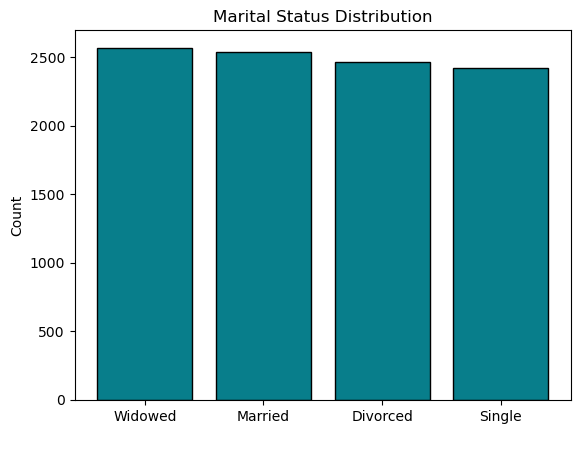

In [99]:
MLH.bar_graph(X = df_decoded['Maritial_Status'], title = 'Marital Status Distribution', xlabel = ' ', filename = 'Distribution_Marital_Status.png')

The distribution is fairly even across all categories, with Widowed being slightly higher.

##### 4.2.3.2.4. `Occupation`

`Occupation` represents the employment status of the patient.

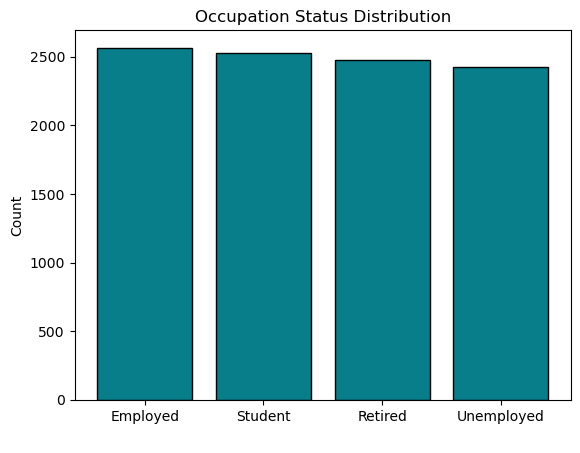

In [100]:
MLH.bar_graph(X = df_decoded['Occupation'], title = 'Occupation Status Distribution', xlabel = ' ', filename = 'Distribution_Occupation.png')

The distribution is relatively balanced across categories. Employed and Student categories are slightly more frequent than Retired and Unemployed.

##### 4.2.3.2.5. `Income_Level`

`Income_Level` represents the financial status of the patient.

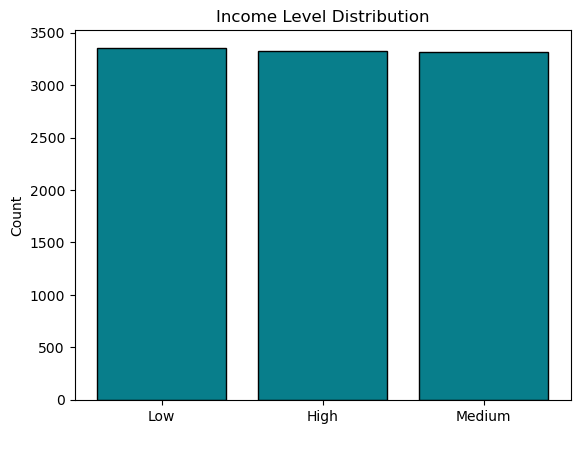

In [101]:
MLH.bar_graph(X = df_decoded['Income_Level'], title = 'Income Level Distribution', xlabel = ' ', filename = 'Distribution_Income_Level.png')

No significant income disparity is observed, suggesting the dataset represents patients across all income levels equally.

##### 4.2.3.2.6. `Living_Area`

`Living_Area` represents whether the patient resides in a rural or urban setting.

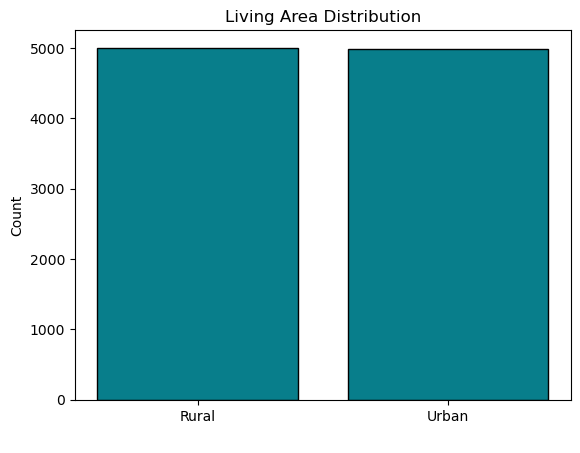

In [102]:
MLH.bar_graph(X = df_decoded['Living_Area'], title = 'Living Area Distribution', xlabel = ' ', filename = 'Distribution_Living_Area.png')

The distribution is almost perfectly balanced between Rural and Urban areas.

##### 4.2.3.2.7. `Family_History`

`Family_History` indicates whether the patient has a family history of schizophrenia.

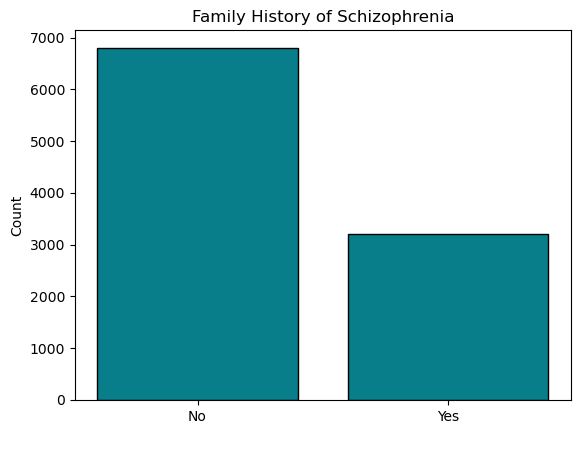

In [103]:
MLH.bar_graph(X = df_decoded['Family_History'], title = 'Family History of Schizophrenia', xlabel = ' ', filename = 'Distribution_Family_History.png')

The majority of patients do not have a family history of schizophrenia, with nearly twice as many "No" cases as "Yes" cases.

##### 4.2.3.2.8. `Substance_use`

`Substance_Use` indicates whether the patient has a history of substance use.

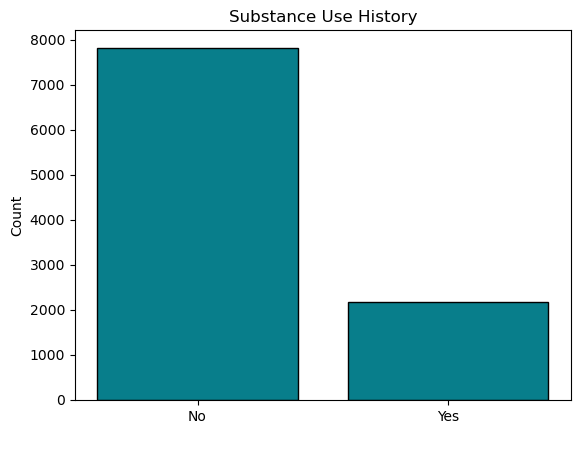

In [104]:
MLH.bar_graph(X = df_decoded['Substance_use'], title = 'Substance Use History', xlabel = ' ', filename = 'Distribution_Substance_Use.png')

The majority of patients do not have a history of substance use, with a large difference between the "No" and "Yes" groups.

##### 4.2.3.2.9. `Suicide_Attempt`

`Suicide_Attempt` indicates whether the patient has a history of attempted suicide.

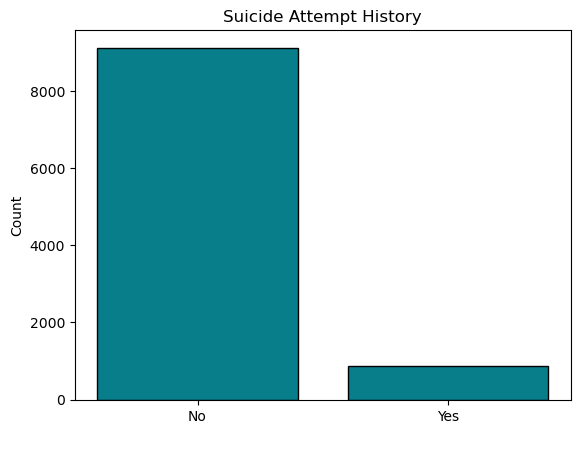

In [105]:
MLH.bar_graph(X = df_decoded['Suicide_Attempt'], title = 'Suicide Attempt History', xlabel = ' ', filename = 'Distribution_Suicide_Attempt.png')

The vast majority of patients have not attempted suicide, with only a small proportion having a history of attempts.

##### 4.2.3.2.10. `Social_Support`

`Social_Support` represents the level of social support available to the patient.

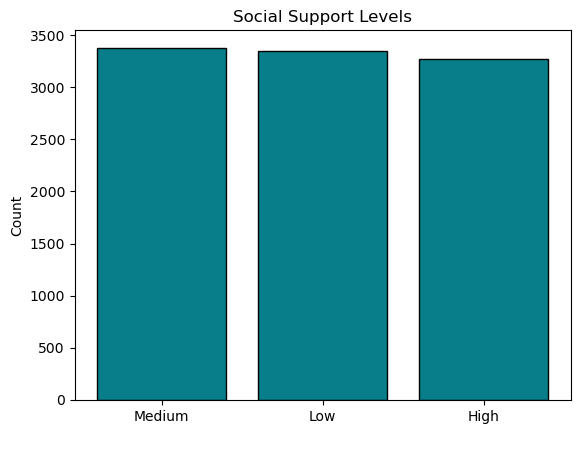

In [106]:
MLH.bar_graph(X = df_decoded['Social_Support'], title = 'Social Support Levels', xlabel = ' ', filename = 'Distribution_Social_Support.png')

The distribution of Low, Medium, and High social support levels is nearly equal, suggesting that patients in the dataset come from diverse social backgrounds.

##### 4.2.3.2.11. `Stress_Factors`

`Stress_Factors` represents the level of stressors affecting the patient.

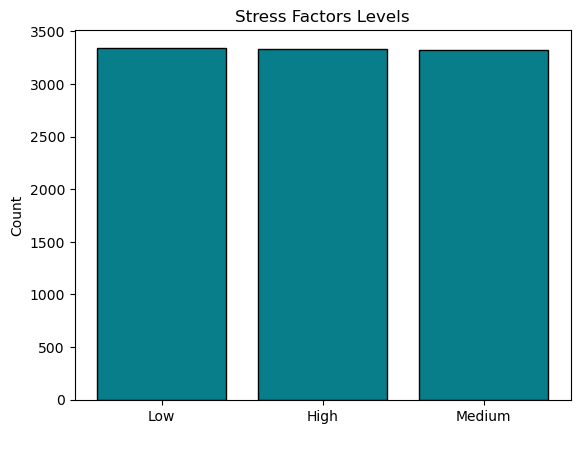

In [107]:
MLH.bar_graph(X = df_decoded['Stress_factors'], title = 'Stress Factors Levels', xlabel = ' ', filename = 'Distribution_Stress_Factors.png')

The distribution of Low, Medium, and High stress factors is nearly balanced, indicating that patients in the dataset experience a wide range of stress levels.

##### 4.2.3.2.12. `Medication_Adherence`

`Medication_Adherence` represents how well the patient follows their prescribed medication regimen.

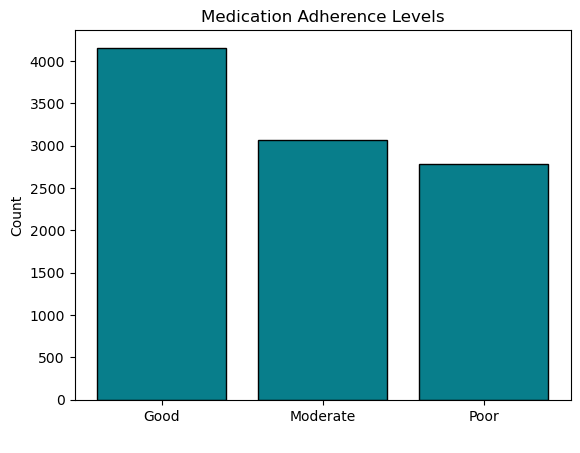

In [108]:
MLH.bar_graph(X = df_decoded['Medication_Adherence'], title = 'Medication Adherence Levels', xlabel = ' ', filename = 'Distribution_Medication_Adherence.png')

Good adherence is the most common category, meaning a majority of patients follow their medication regimen well. A significant portion of patients have Moderate or Poor adherence, which highlights potential compliance issues.

### 4.2.4. Feature Relationships

### 4.2.4.1. Numerical Features Correlations

In [109]:
numeric_corr = df_decoded.select_dtypes(include = np.int64).iloc[:, 1:].corr()
numeric_corr

,Age,Disease_Duration,Hospitalizations,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score
Age,1.000000000,0.008712167,0.017385401,0.016859070,0.021742461,-0.022125535
Disease_Duration,0.008712167,1.000000000,0.680782092,0.708022728,0.702451232,-0.704236581
Hospitalizations,0.017385401,0.680782092,1.000000000,0.680192939,0.674542150,-0.673656317
Positive_Symptom_Score,0.016859070,0.708022728,0.680192939,1.000000000,0.719360235,-0.720623788
Negative_Symptom_Score,0.021742461,0.702451232,0.674542150,0.719360235,1.000000000,-0.712910327
GAF_Score,-0.022125535,-0.704236581,-0.673656317,-0.720623788,-0.712910327,1.000000000


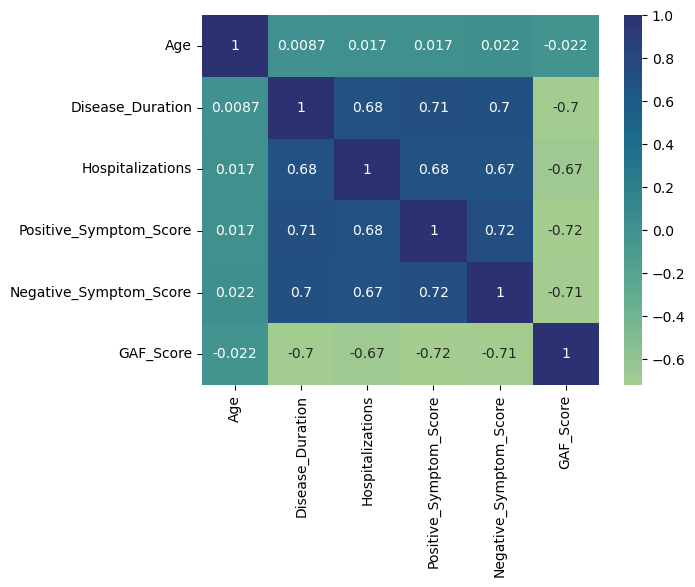

In [110]:
sns.heatmap(data = numeric_corr, annot = True, cmap = 'crest')
full_path = os.path.join(os.getcwd(), 'outputs/visuals/numerical_heatmap.png')
plt.savefig(full_path, bbox_inches='tight')

The correlation matrix reveals several key relationships between numerical variables in the dataset:
* `GAF_Score` shows strong negative correlations with `Positive Symptom Score` (-0.72), `Negative Symptom Score` (-0.71), `Disease Duration` (-0.70), and `Hospitalizations` (-0.67). This suggests that greater symptom severity, longer disease duration, and more frequent hospitalizations are all associated with worse overall functioning.
* Positive and Negative Symptom Scores are highly correlated (0.72), indicating that patients with severe positive symptoms also tend to experience severe negative symptoms. 
* `Hospitalizations` and `Disease Duration` (0.68) also show a strong relationship, suggesting that patients with a longer disease history are more frequently hospitalized, likely due to chronic relapses.
* `Age` shows no meaningful correlation with other variables

### 4.2.4.2. Scatterplot Matrix

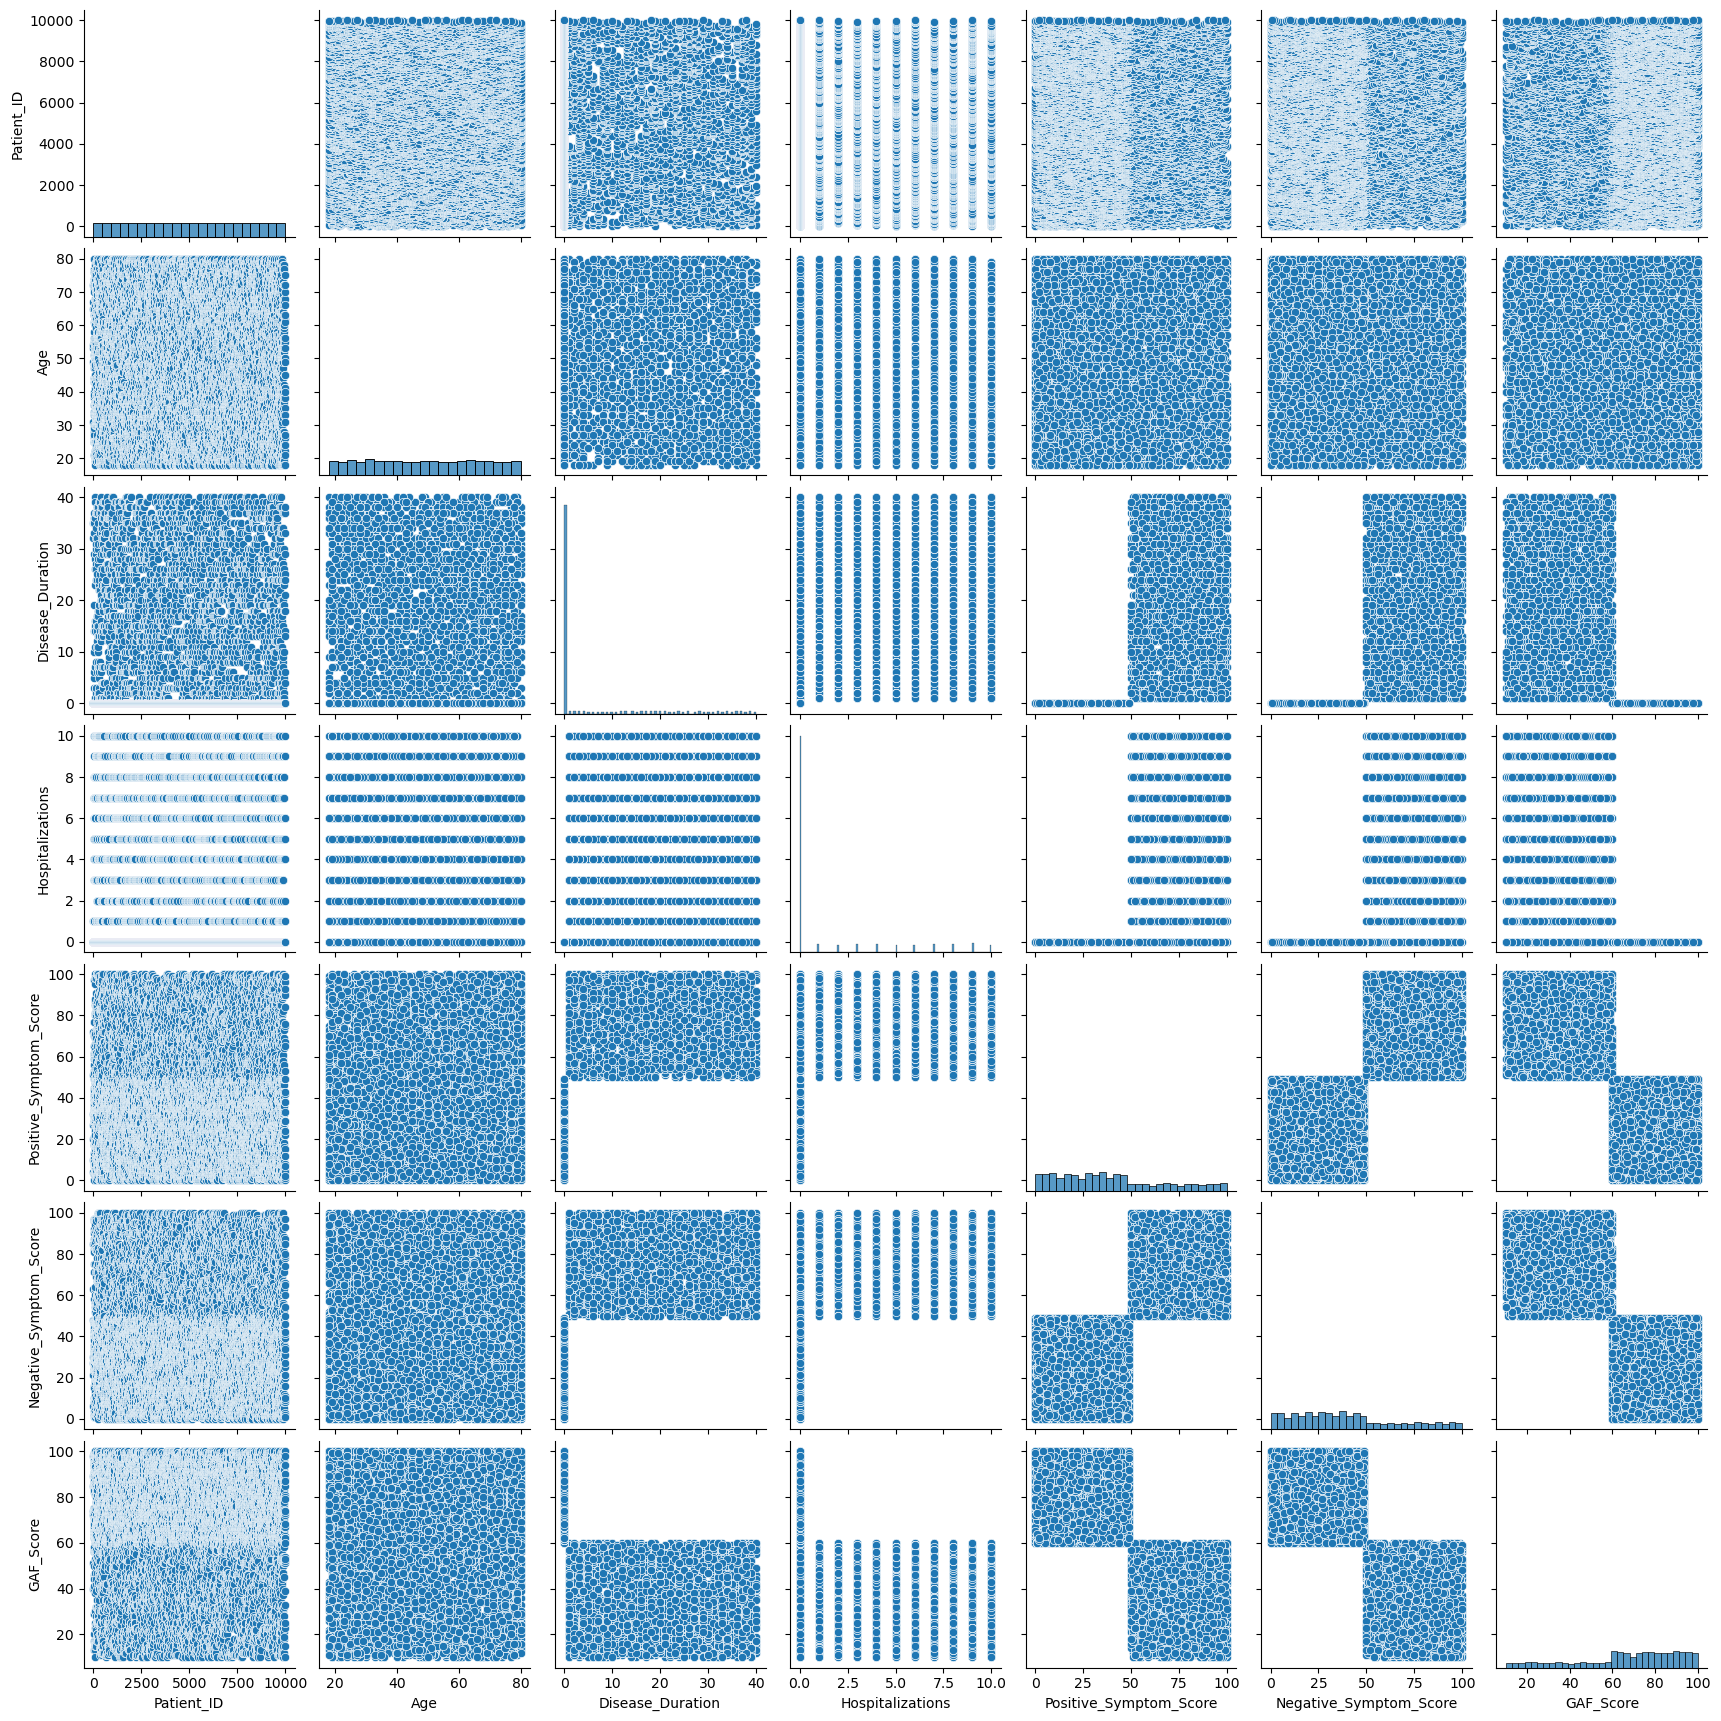

In [111]:
sns.pairplot(df_decoded)
full_path = os.path.join(os.getcwd(), 'outputs/visuals/numerical_scatterplot.png')
plt.savefig(full_path, bbox_inches='tight')

### 4.2.4.3. Variance Inflation Factor (VIF)

In [112]:
X_num = df_decoded.select_dtypes(np.int64)
X_num = sm.add_constant(X_num)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif_data

,Feature,VIF
0,const,54.678499429
1,Patient_ID,1.000420741
2,Age,1.000804275
3,Disease_Duration,2.719521097
4,Hospitalizations,2.414397477
5,Positive_Symptom_Score,2.871830599
6,Negative_Symptom_Score,2.787462750
7,GAF_Score,2.798569271


The Variance Inflation Factor (VIF) analysis suggests that no severe multicollinearity is present among the numerical variables, as all VIF values remain below 5. `Age` has very low VIF value (~1.00), indicating that it is statistically independent from other features. Variables such as `Disease_Duration` (2.72), `Hospitalizations` (2.41), `Positive_Symptom_Score` (2.87),` Negative_Symptom_Score` (2.78), and `GAF_Score` (2.80) show moderate correlation but do not reach concerning levels. Given these results, there is no immediate need for variable removal due to multicollinearity.

---

# 5. Data Preprocessing

## 5.1. Feature Creation

When transforming the `Hospitalizations` variable, several approaches can be considered. Binary encoding is likely the most effective for classification models, as it simplifies the data by dietermining between patients who have never been hospitalized and those who have had at least one hospitalization. This method helps prevents the extreme skew seen earlier from affecting the model while maintaining relevant information. Another possible transformation is ordinal binning (e.g., Low, Medium, High), which provides a more granular view of hospitalization frequency but suffers from arbitrary cutoffs. One-hot encoding could also be used, creating separate binary features for different hospitalization ranges, but it may unnecessarily increase dimensionality. Given the distribution of hospitalizations in this dataset, where most patients have zero hospitalizations, binary encoding is the preferred approach as it best captures the key distinction without losing interpretability.

In [113]:
df['Hospitalizations_cat'] = np.where(df['Hospitalizations'] == 0, 0, 1)
df['Hospitalizations_cat'].value_counts()

Hospitalizations_cat
0    7378
1    2622
Name: count, dtype: int64

## 5.2. Spliting the Data into testing and training

In [152]:
from sklearn.model_selection import train_test_split

# Creating two tables one with the features and one with outcome variable
y_diagnosis = df_decoded['Diagnosis']
# These features are being dropped since they would introduce data leakage into the 
x_features = df_decoded.drop(labels = ['Patient_ID', 
                                       'Diagnosis', 
                                       'Positive_Symptom_Score', 
                                       'Negative_Symptom_Score', 'GAF_Score', 'Disease_Duration', 'Hospitalizations'], axis = 1)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(x_features, y_diagnosis, test_size = 0.3, random_state = 42, stratify = y_diagnosis, shuffle= True)

y_train_clf = y_train_clf.map({'Not Schizophrenic': 0, 'Schizophrenic': 1})
y_test_clf = y_test_clf.map({'Not Schizophrenic': 0, 'Schizophrenic': 1})


In [153]:
y_train_clf.value_counts(normalize=True)

Diagnosis
0   0.711285714
1   0.288714286
Name: proportion, dtype: float64

In [154]:
y_test_clf.value_counts(normalize=True)

Diagnosis
0   0.711333333
1   0.288666667
Name: proportion, dtype: float64

In [155]:
X_train_clf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 8505 to 1381
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   7000 non-null   int64 
 1   Gender                7000 non-null   object
 2   Education_Level       7000 non-null   object
 3   Maritial_Status       7000 non-null   object
 4   Occupation            7000 non-null   object
 5   Income_Level          7000 non-null   object
 6   Living_Area           7000 non-null   object
 7   Family_History        7000 non-null   object
 8   Substance_use         7000 non-null   object
 9   Suicide_Attempt       7000 non-null   object
 10  Social_Support        7000 non-null   object
 11  Stress_factors        7000 non-null   object
 12  Medication_Adherence  7000 non-null   object
dtypes: int64(1), object(12)
memory usage: 765.6+ KB


---

# 6. Model Development

## 6.1 Logistic Regression

### 6.1.1. Baseline Logistic Regression Model

#### Pipeline and Training

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

ordinal_categories = [
    ['Primary', 'Middle School', 'High School', 'University', 'Postgraduate'],  # Education_Level
    ['Low', 'Medium', 'High'],  # Income_Level
    ['Low', 'Medium', 'High'],  # Social_Support
    ['Low', 'Medium', 'High'],  # Stress_Factors
    ['Poor', 'Moderate', 'Good']  # Medication_Adherence
]

ordinal_cat = ['Education_Level', 'Income_Level', 'Social_Support', 'Stress_factors', 'Medication_Adherence']
ohe_cat = ['Gender', 'Maritial_Status', 'Occupation', 'Living_Area', 'Family_History', 'Substance_use', 'Suicide_Attempt']
num_cat = ['Age']

ct = ColumnTransformer(transformers = [('Scaling', StandardScaler(), num_cat),
                                       ('Ordinal', OrdinalEncoder(), ordinal_cat,),
                                       ('OHE', OneHotEncoder(), ohe_cat)])

logistic_pipeline = Pipeline(steps = [('Preprocessing', ct), 
                                      ('Logistic Regression', LogisticRegression())])

In [158]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X = X_train_clf, y = y_train_clf)
dummy_pred = dummy_clf.predict(X_train_clf)

In [159]:
logistic_pipeline.fit(X = X_train_clf, y = y_train_clf)
log_pred = logistic_pipeline.predict(X_train_clf)

#### Performance Metrics

In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def cm_metrics(targets, predictions, digits:int = 2, display_cm = False) -> None:
    '''Prints performance metrics and confusion metric for a model'''

    print('Performance Metrics')
    acccuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions, zero_division = 0)
    recall = recall_score(targets, predictions, zero_division = 0)
    f1 = f1_score(targets, predictions, zero_division = 0)
    cm = confusion_matrix(targets,predictions)
    print(f'Accuracy: {round(acccuracy * 100, digits)}%')
    print(f'Precision: {round(precision * 100, digits)}%')
    print(f'Recall: {round(recall * 100, digits)}%')
    print(f'F1-score: {round(f1 * 100, digits)}%\n')

    if display_cm:
        print('Confusion Matrix')
        cm_flat = cm.ravel() # Flatten the matrix
        for i, label in enumerate(['True Negatives', 'False Positives', 'False Negatives', 'True Positives']):
            print(f'{label}: {cm_flat[i]}')

In [189]:
cm_metrics(targets = y_train_clf, predictions = dummy_pred)

Performance Metrics
Accuracy: 71.13%
Precision: 0.0%
Recall: 0.0%
F1-score: 0.0%



In [190]:
cm_metrics(targets = y_train_clf, predictions = log_pred)

Performance Metrics
Accuracy: 83.74%
Precision: 79.69%
Recall: 58.63%
F1-score: 67.56%



The logistic regression model shows improvement over the dummy classifier. It correctly classified 83.74% of all of the instances. When the logistic regression model predicted an individual has schizoprehia it is correct 80% of the time. However, the model only correctly identifies about 59% of actual schizophrenia cases. There were 302 patients that were incorrectly classified as having schizophrenia. 

Confusion matrix graph for the baseline logistic regression model:

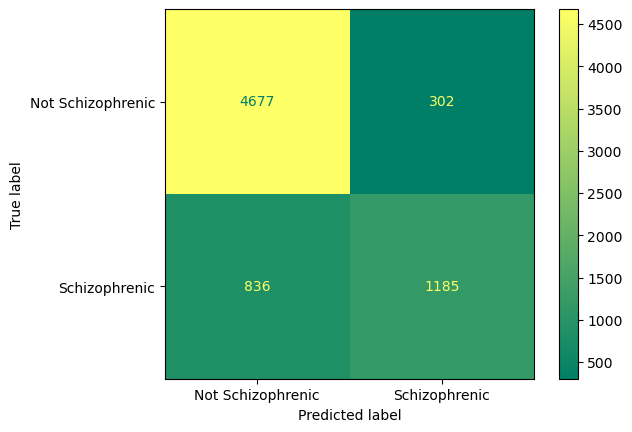

In [231]:
log_reg_cm = confusion_matrix(y_true = y_train_clf, y_pred = log_pred)
log_cm_disp = ConfusionMatrixDisplay(confusion_matrix = log_reg_cm, display_labels = ['Not Schizophrenic', 'Schizophrenic'])
log_cm_disp.plot(cmap = 'summer');
log_cm_disp.figure_.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'base_log_cm.png'));
plt.show();

In [192]:
from sklearn.model_selection import cross_val_score

log_cross_accuracy = cross_val_score(estimator = logistic_pipeline, X = X_train_clf, y = y_train_clf, cv = 4, scoring = 'accuracy')
log_cross_recall = cross_val_score(estimator = logistic_pipeline, X = X_train_clf, y = y_train_clf, cv = 4, scoring = 'recall')
log_cross_rocauc = cross_val_score(estimator = logistic_pipeline, X = X_train_clf, y = y_train_clf, cv = 4, scoring = 'roc_auc')
print(f'Accuracy: {log_cross_accuracy}')
print(f'Recall: {log_cross_recall}')
print(f'ROC-AUC: {log_cross_rocauc}')

Accuracy: [0.82514286 0.83371429 0.85085714 0.83542857]
Recall: [0.54743083 0.58217822 0.62772277 0.56435644]
ROC-AUC: [0.86453554 0.88261959 0.86639787 0.8594457 ]


Overall the cross-validation indicates that the model generalizes well across different train-test splits and is not overfitting on a single train-test split.

#### ROC-AUC and Analysis

The following code will retrive the predicted probability of an instance belong to class 1 (Schizophrenic):

In [200]:
y_proba = logistic_pipeline.predict_proba(X_train_clf)[:, 1]

In [201]:
from sklearn.metrics import roc_auc_score

log_auc_score = roc_auc_score(y_true = y_train_clf, y_score = y_proba)
print(f'ROC-AUC Score: {log_auc_score:.4f}')

ROC-AUC Score: 0.8709


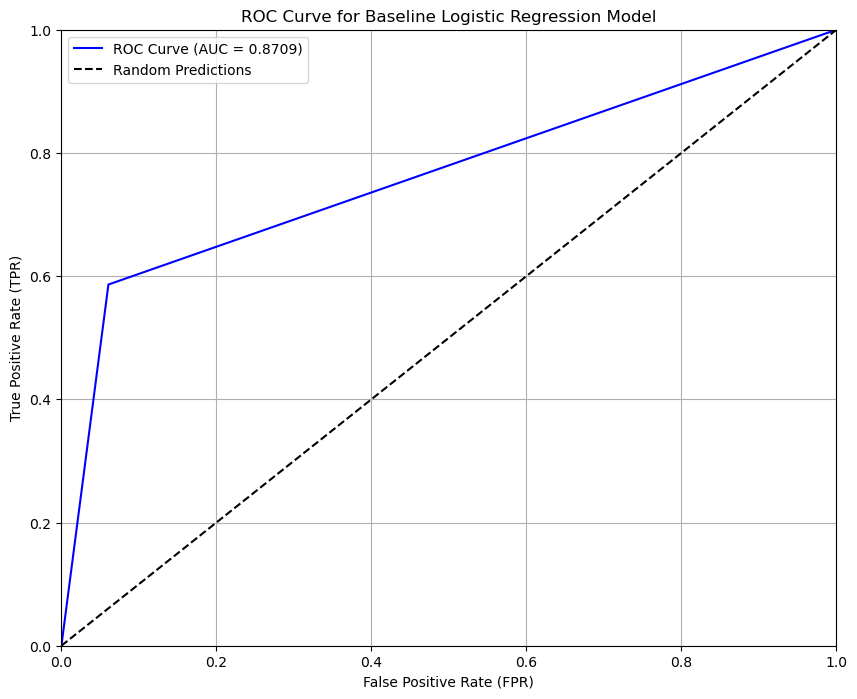

In [232]:
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_true = y_train_clf, y_score = log_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color = 'blue', label = f'ROC Curve (AUC = {log_auc_score:.4f})')
plt.plot([0,1], [0,1], color = 'black', linestyle = '--', label = 'Random Predictions')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Baseline Logistic Regression Model')
plt.legend()
plt.grid()
plt.margins(x = 0, y = 0)
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'base_log_ROC.png'));
plt.show();

The model achieves a strong classification performance with an AUC-ROC score of 0.87, indicating that it effectively distinguishes between individuals with and without schizophrenia. The ROC curve initially shows a steep rise, meaning the model captures a high proportion of true positives while keeping false positives low. However, beyond a True Positive Rate (TPR) of ~0.6, the False Positive Rate (FPR) increases more dramatically, suggesting that further improvements in recall come at the cost of more incorrect classifications of non-schizophrenic individuals. This trade-off may indicate the need for threshold adjustment depending on the problem's priority (i.e,, minimizing false negatives vs. false positives).

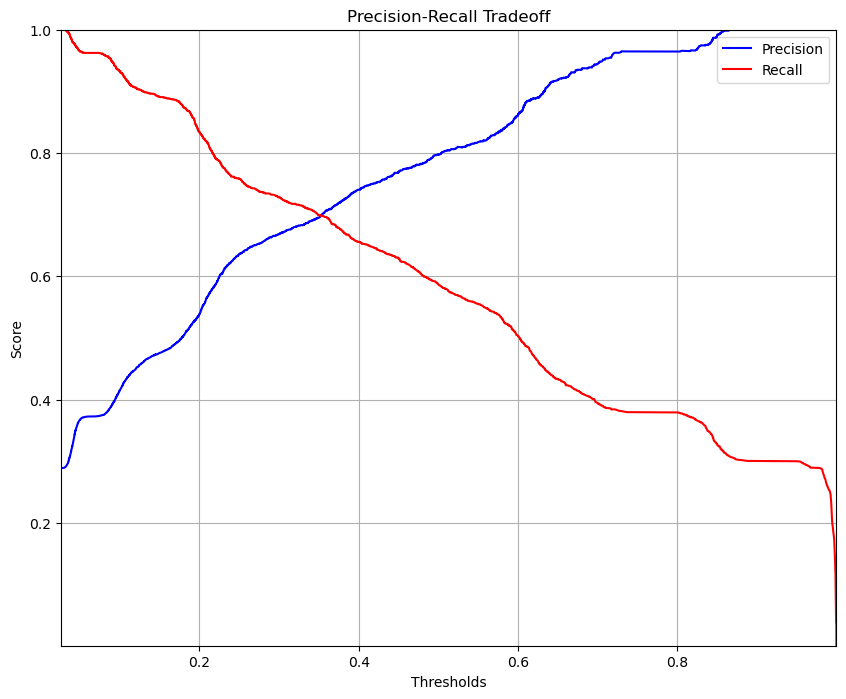

In [235]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true = y_train_clf, y_score = y_proba)

plt.figure(figsize = (10,8))
plt.plot(thresholds, precision[:-1], label = 'Precision', color = 'blue')
plt.plot(thresholds, recall[:-1], label = 'Recall', color = 'red')
plt.xlabel(xlabel = 'Thresholds')
plt.ylabel(ylabel = 'Score')
plt.title(label = 'Precision-Recall Tradeoff')
plt.legend()
plt.grid()
plt.margins(x = 0, y = 0)
plt.savefig(os.path.join(os.getcwd(), 'outputs', 'visuals', 'base_log_PRCurve'))
plt.show()

In [236]:
new_threshold = 0.35
log_pred_new = (y_proba >= new_threshold).astype(int)

In [242]:
cm_metrics(targets = y_train_clf, predictions = log_pred, display_cm = True) # 0.5 Threshold metrics

Performance Metrics
Accuracy: 83.74%
Precision: 79.69%
Recall: 58.63%
F1-score: 67.56%

Confusion Matrix
True Negatives: 4677
False Positives: 302
False Negatives: 836
True Positives: 1185


In [241]:
cm_metrics(targets = y_train_clf, predictions = log_pred_new, display_cm = True) # New threshold metric 

Performance Metrics
Accuracy: 82.46%
Precision: 69.5%
Recall: 69.92%
F1-score: 69.71%

Confusion Matrix
True Negatives: 4359
False Positives: 620
False Negatives: 608
True Positives: 1413


After analyzing the Precision-Recall Tradeoff Curve, the classification threshold was adjusted from the default 0.5 to 0.35, prioritizing recall over precision. This change resulted in a significant increase in recall (from 58.63% to 69.92%), meaning that the model correctly identifies more schizophrenia cases. However, this came at the cost of a drop in precision (from 79.69% to 69.5%), leading to more false positives. Despite this trade-off, the overall F1-score improved (from 67.56% to 69.71%), indicating that the model is more balanced between precision and recall.

In a medical context, prioritizing recall is crucial since failing to diagnose schizophrenia (false negatives) can have severe consequences for an individual. Although the number of false positives increased, it is preferable to misclassify some non-schizophrenic individuals rather than risk missing true schizophrenia cases. Since, misclassified individuals can be further evaluated in a clinical setting, reducing the risk of overlooking an actual diagnosis. Given these improvements and trade-offs, the adjusted 0.38 threshold is a better fit for this problem and will be used for further analysis.

### 6.2.1  Hypertuned Logistic Regression Models 

This section compares different logistic regression models using various regularization techniques: L1 (Lasso), L2 (Ridge), and Elastic-Net. L1 regularization (Lasso) penalizes the model by shrinking the coefficients of less important features to zero, effectively performing feature selection. L2 regularization (Ridge) penalizes large coefficients but keeps all features, distributing impact more evenly across all features. Elastic-Net combines both L1 and L2 penalties, balancing feature selection and coefficient shrinkage. After evaluating each method, the best-performing regularization technique will be selected for further hyperparameter tuning.

In [253]:
l1_logistic = Pipeline(steps = [('Preprocessing', ct), 
                                ('LogisticRegression', LogisticRegression(penalty = 'l1', solver = 'liblinear'))])

l2_logistic = Pipeline(steps = [('Preprocessing', ct), 
                                ('LogisticRegression', LogisticRegression(penalty = 'l2'))])

elastic_logistic = Pipeline(steps = [('Preprocessing', ct), 
                                     ('LogisticRegression', LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.5, solver = 'saga',
                                                                               max_iter = 500))])

In [254]:
l1_logistic.fit(X = X_train_clf, y = y_train_clf)
l2_logistic.fit(X = X_train_clf, y = y_train_clf)
elastic_logistic.fit(X = X_train_clf, y = y_train_clf)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Scaling', StandardScaler(),
                                                  ['Age']),
                                                 ('Ordinal', OrdinalEncoder(),
                                                  ['Education_Level',
                                                   'Income_Level',
                                                   'Social_Support',
                                                   'Stress_factors',
                                                   'Medication_Adherence']),
                                                 ('OHE', OneHotEncoder(),
                                                  ['Gender', 'Maritial_Status',
                                                   'Occupation', 'Living_Area',
                                                   'Family_History',
                                                   'Substance_use',
                                                   'Suicide_Attempt'])])),
                ('LogisticRegression',
                 LogisticRegression(l1_ratio=0.5, max_iter=500,
                                    penalty='elasticnet', solver='saga'))])

In [256]:
l1_pred = l1_logistic.predict(X = X_train_clf)
l2_pred = l2_logistic.predict(X = X_train_clf)
elastic_pred = elastic_logistic.predict(X = X_train_clf)

In [267]:
cm_metrics(targets = y_train_clf, predictions = log_pred, display_cm = True)

Performance Metrics
Accuracy: 83.74%
Precision: 79.69%
Recall: 58.63%
F1-score: 67.56%

Confusion Matrix
True Negatives: 4677
False Positives: 302
False Negatives: 836
True Positives: 1185


In [257]:
cm_metrics(targets = y_train_clf, predictions = l1_pred, display_cm = True)

Performance Metrics
Accuracy: 83.79%
Precision: 79.85%
Recall: 58.63%
F1-score: 67.62%

Confusion Matrix
True Negatives: 4680
False Positives: 299
False Negatives: 836
True Positives: 1185


In [258]:
cm_metrics(targets = y_train_clf, predictions = l2_pred, display_cm = True)

Performance Metrics
Accuracy: 83.74%
Precision: 79.69%
Recall: 58.63%
F1-score: 67.56%

Confusion Matrix
True Negatives: 4677
False Positives: 302
False Negatives: 836
True Positives: 1185


In [259]:
cm_metrics(targets = y_train_clf, predictions = elastic_pred, display_cm = True)

Performance Metrics
Accuracy: 83.77%
Precision: 79.8%
Recall: 58.63%
F1-score: 67.6%

Confusion Matrix
True Negatives: 4679
False Positives: 300
False Negatives: 836
True Positives: 1185


Retrieving the important features selected by the Lasso regression model

In [266]:
feature_names = ct.get_feature_names_out()
l1_coefficients = l1_logistic.named_steps['LogisticRegression'].coef_
important_features = [feature for feature, coef in zip(feature_names, l1_coefficients.tolist()) if coef != 0]
print(f"Features Selected by L1 Regularization: {important_features}")

Features Selected by L1 Regularization: ['Scaling__Age']


The lasso model only selected the Age coefficient in it's regularization. 

Overall, all of the regularizied logistic models had minimal impact or no difference compared to the base line logistic model. This could be due to standardization stregnth hyperparameter (C) to high or the features being well-scaled. Regularization primarily helps when features have large variance or extreme coefficients, but if the features are already scaled, the impact of L1 and L2 may be minimal. Lastly, from the VIF analysis early, we noticed that the features do not have strong correlations with one another. 

### 6.2.2 Hyperparameter Optimization on Best Model

In [273]:
from sklearn.model_selection import GridSearchCV

param_grid = {'Logistic Regression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'Logistic Regression__solver': ['lbfgs', 'liblinear', 'saga'],
              'Logistic Regression__max_iter': [100, 500, 1000]}

# Define the pipeline
logistic_pipeline = Pipeline(steps = [('Preprocessing', ct), 
                                      ('Logistic Regression', LogisticRegression(penalty='l2'))])  # Default is L2


grid_search_log = GridSearchCV(estimator = logistic_pipeline, param_grid = param_grid, scoring = 'recall',
                               cv = 3, n_jobs = -1)

In [274]:
grid_search_log.fit(X = X_train_clf, y = y_train_clf)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('Scaling',
                                                                         StandardScaler(),
                                                                         ['Age']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Education_Level',
                                                                          'Income_Level',
                                                                          'Social_Support',
                                                                          'Stress_factors',
                                                                          'Medication_Adherence']),
                                                                        ('OHE',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Maritial_Status',
                                                                          'Occupation',
                                                                          'Living_Area',
                                                                          'Family_History',
                                                                          'Substance_use',
                                                                          'Suicide_Attempt'])])),
                                       ('Logistic Regression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'Logistic Regression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                         'Logistic Regression__max_iter': [100, 500, 1000],
                         'Logistic Regression__solver': ['lbfgs', 'liblinear',
                                                         'saga']},
             scoring='recall')

In [275]:
grid_search_log.best_params_

{'Logistic Regression__C': 10,
 'Logistic Regression__max_iter': 100,
 'Logistic Regression__solver': 'lbfgs'}

In [276]:
grid_log_pred = grid_search_log.predict(X = X_train_clf)

In [278]:
cm_metrics(targets = y_train_clf, predictions = log_pred, display_cm = True)

Performance Metrics
Accuracy: 83.74%
Precision: 79.69%
Recall: 58.63%
F1-score: 67.56%

Confusion Matrix
True Negatives: 4677
False Positives: 302
False Negatives: 836
True Positives: 1185


In [277]:
cm_metrics(targets = y_train_clf, predictions = grid_log_pred, display_cm = True)

Performance Metrics
Accuracy: 83.76%
Precision: 79.74%
Recall: 58.63%
F1-score: 67.58%

Confusion Matrix
True Negatives: 4678
False Positives: 301
False Negatives: 836
True Positives: 1185


In [288]:
grid_proba = grid_search_log.predict_proba(X = X_train_clf)[:, 1]
grid_proba[1]

np.float64(0.9992562390209785)

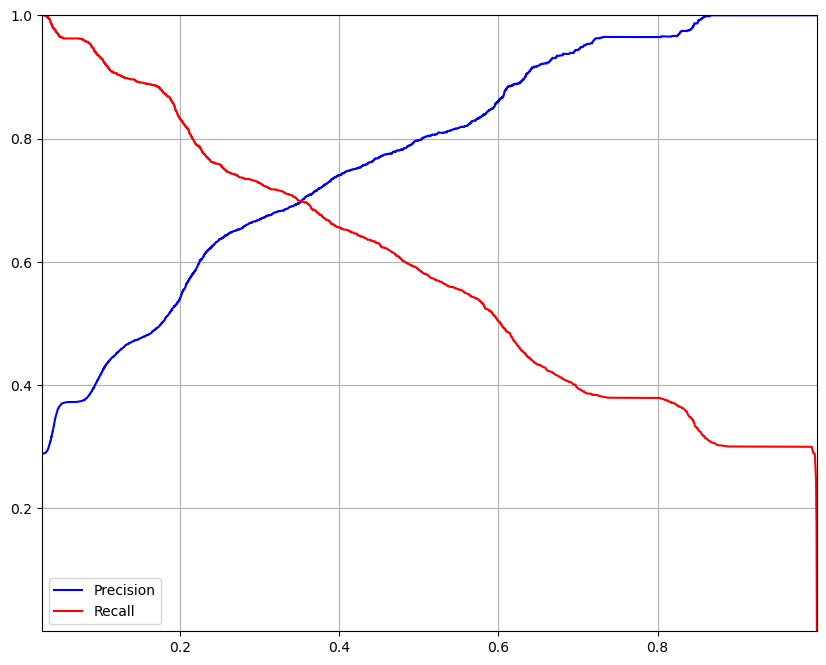

In [289]:
from sklearn.metrics import precision_recall_curve

grid_proba = grid_search_log.predict_proba(X = X_train_clf)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_true = y_train_clf, y_score = grid_proba)



plt.figure(figsize = (10,8))
plt.plot(thresholds, precision[:-1], label = 'Precision', color = 'blue')
plt.plot(thresholds, recall[:-1], label = 'Recall', color = 'red')
plt.grid()
plt.legend()
plt.margins(x = 0, y = 0)
plt.show();

In [290]:
grid_new_threshold = 0.38 
grid_log_pred_new = (grid_proba >= grid_new_threshold).astype(int)

In [ ]:
cm_metrics(targets = y_train_clf, predictions = log_pred_new, display_cm = True) # Base logistic model

Performance Metrics
Accuracy: 82.46%
Precision: 69.5%
Recall: 69.92%
F1-score: 69.71%

Confusion Matrix
True Negatives: 4359
False Positives: 620
False Negatives: 608
True Positives: 1413


In [ ]:
cm_metrics(targets = y_train_clf, predictions = grid_log_pred_new, display_cm = True) # Hyperparameter tuned model

Performance Metrics
Accuracy: 83.11%
Precision: 72.35%
Recall: 67.19%
F1-score: 69.68%

Confusion Matrix
True Negatives: 4460
False Positives: 519
False Negatives: 663
True Positives: 1358


Since our priority is recall, the baseline logistic regression model with the adjusted threshold is the better option.

## 6.2. Support Vector Machines (SVM)

Since SVM are senestive to feature scaling we willreuse the previous pipeline for encoding the categorical variables and scaling any numerical variables. 

In [307]:
from sklearn.svm import SVC

svc_pipeline = Pipeline(steps = [('Preprocessing', ct), 
                                 ('SVC', SVC(kernel = 'rbf', random_state = 42))])

In [308]:
svc_pipeline.fit(X = X_train_clf, y = y_train_clf)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Scaling', StandardScaler(),
                                                  ['Age']),
                                                 ('Ordinal', OrdinalEncoder(),
                                                  ['Education_Level',
                                                   'Income_Level',
                                                   'Social_Support',
                                                   'Stress_factors',
                                                   'Medication_Adherence']),
                                                 ('OHE', OneHotEncoder(),
                                                  ['Gender', 'Maritial_Status',
                                                   'Occupation', 'Living_Area',
                                                   'Family_History',
                                                   'Substance_use',
                                                   'Suicide_Attempt'])])),
                ('SVC', SVC(random_state=42))])

In [309]:
svc_pred = svc_pipeline.predict(X_train_clf)

In [310]:
cm_metrics(targets = y_train_clf, predictions = log_pred_new, display_cm = True) # Base logistic model

Performance Metrics
Accuracy: 82.46%
Precision: 69.5%
Recall: 69.92%
F1-score: 69.71%

Confusion Matrix
True Negatives: 4359
False Positives: 620
False Negatives: 608
True Positives: 1413


In [ ]:
cm_metrics(targets = y_train_clf, predictions = svc_pred, display_cm = True) # SVM model

Performance Metrics
Accuracy: 84.69%
Precision: 85.81%
Recall: 56.26%
F1-score: 67.96%

Confusion Matrix
True Negatives: 4791
False Positives: 188
False Negatives: 884
True Positives: 1137


The SVM model slightly outperforms logistic regression in accuracy, meaning it classifies more samples correctly overall. The SVM model has a much higher precision, meaning fewer false positives (misclassifying non-schizophrenic as schizophrenic). The Logistic regression model has higher recall, meaning it captures more true schizophrenia cases but at the cost of more false positives. The SVM model is more conservative in classifying schizophrenia, prioritizing precision over recall. 

In [ ]:
cross_val_score(estimator = svc_pipeline, X = X_train_clf, y = y_train_clf, scoring = 'accuracy', cv = 4)

array([0.82714286, 0.82857143, 0.84142857, 0.84214286, 0.82857143])

In [ ]:
cross_val_score(estimator = svc_pipeline, X = X_train_clf, y = y_train_clf, scoring = 'recall', cv = 4)

array([0.51358025, 0.56683168, 0.56188119, 0.53712871, 0.49009901])

In [316]:
cross_val_score(estimator = svc_pipeline, X = X_train_clf, y = y_train_clf, scoring = 'precision', cv = 4)

array([0.81097561, 0.80487805, 0.86305732, 0.86458333])

---

# 7. Model Evaluation

---

# 8. Results

---

# 9. Conclusions

---